In [10]:
import numpy as np # linear algebra
np.bool = np.bool_
np.float = float 
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('TkAgg') #util para visualizar las imagenes y guardarlas en una ruta fija.
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")


../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad.png
../resources/causalidad\causalidad2.dot
../resources/causalidad\causalidad_exitosos.dot
../resources/causalidad\causalidad_hito1.dot
../resources/causalidad\graph_exitosos.png
../resources/causalidad\graph_hito1.png


In [11]:
# Read and preview data
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [12]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
# #reliminando columna sol1, ya que usaremos aprobado
df = df.drop('sol1', axis=1)
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'aprobado'],
      dtype='object')


In [13]:
# Variables de tratamiento
treatment_cols = ['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52']
# Variable de resultado
outcome_col = "aprobado"  

data = df[treatment_cols + [outcome_col]]

In [14]:
X = data[treatment_cols]
y = data[outcome_col]

In [15]:
model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=1502,
    n_estimators=500,
)
model.fit(X, y)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=500, random_state=1502)

In [16]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 828/839 [00:42<00:00]        

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


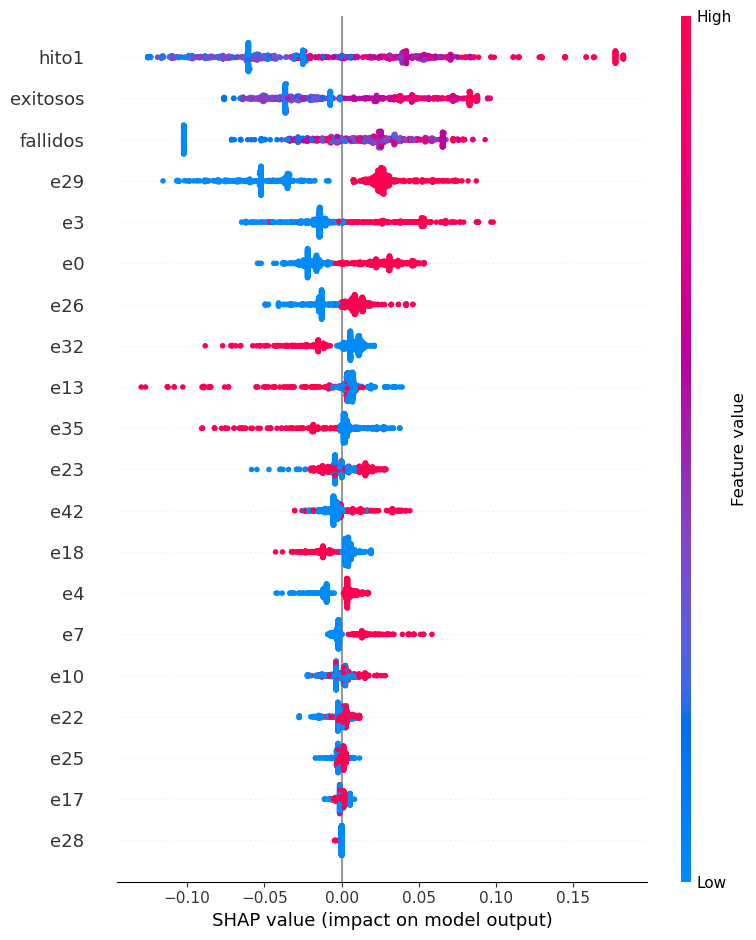

In [17]:
shap.summary_plot(shap_values, X)

In [18]:
# Selecciona la variable de tratamiento continua y el resultado binario
treatment_col = "hito1"  # Variable de tratamiento continua
outcome_col = "aprobado"  # Variable de resultado binario

# Crea el DataFrame con la variable de tratamiento y el resultado
data = df[[treatment_col, outcome_col]]

# Añade una columna de intercepto al DataFrame
data['intercept'] = 1

# Ajusta el modelo de regresión logística
logit_model = sm.Logit(data[outcome_col], data[[treatment_col, 'intercept']])
result = logit_model.fit()

# Imprime los resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.623194
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               aprobado   No. Observations:                  839
Model:                          Logit   Df Residuals:                      837
Method:                           MLE   Df Model:                            1
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                 0.09625
Time:                        15:29:21   Log-Likelihood:                -522.86
converged:                       True   LL-Null:                       -578.54
Covariance Type:            nonrobust   LLR p-value:                 4.919e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hito1          0.0753      0.008      9.860      0.000       0.060       0.090
intercept     -1.1902      0.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Los resultados obtenidos corresponden al ajuste de un modelo de regresión logística utilizando la variable de tratamiento continua "hito1" y la variable binaria "aprobado". Aquí hay una explicación de los resultados:

+ El coeficiente "hito1" tiene un valor estimado de 0.0753, lo que indica que un aumento de una unidad en la variable de tratamiento "hito1" se asocia con un aumento de aproximadamente 0.0753 en la probabilidad de que el resultado "aprobado" sea igual a 1, manteniendo todas las demás variables constantes.

+ El coeficiente "intercept" tiene un valor estimado de -1.1902, que representa la constante o el término de intersección del modelo de regresión logística. Este valor indica la probabilidad de que el resultado "aprobado" sea igual a 1 cuando todas las variables explicativas son iguales a cero.

+ Los valores p (P>|z|) asociados a los coeficientes indican la significancia estadística de cada coeficiente. En este caso, ambos coeficientes tienen valores p muy pequeños (cercanos a cero), lo que sugiere que son estadísticamente significativos.

Estos resultados indican que la variable de tratamiento "hito1" tiene un efecto significativo en la probabilidad de que el resultado "aprobado" sea igual a 1 en el modelo de regresión logística.